# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 8 de mayo de 2023__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [13]:
RANDOM_STATE = 1234

# Apartado 1: Análisis de sentimientos


__Número de grupo: XX__

__Nombres de los estudiantes: Gonzalo García Fernández y Daniel María Carreño López

## 1) Carga del conjunto de datos

El fichero `IMBD_Dataset.csv` contiene opiniones de películas clasificadas en 2 categorías diferentes (positiva/negativa).

Este set de datos se creó utilizando el "IMDB Dataset of 50K Movie Reviews", el cual contiene 50,000 reseñas de películas con un sentimiento positivo o negativo adjunto a ellas.

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. Comprueba que la distribución de los ejemplos en las clases es la misma en entrenamiento y test. 

In [1]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import sklearn


In [3]:
imbd_file = '/content/drive/MyDrive/IMDB_Dataset.csv'

df=pd.read_csv(imbd_file)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Vemos con el output del anterior que nuestra base de datos esta perfectamente equilibrada y tiene 50000 ejemplos(250000 negativos y 25000 positivos).

In [5]:

corpus =np.array(df['review'])
df2 = df[df['sentiment'] == 'positive']
print('Ejemplo positivo:')
print(df2.head(1)['review'])

df3 = df[df['sentiment'] == 'negative']
print('Ejemplo negativo:')
print(df3.head(1)['review'])


Ejemplo positivo:
0    One of the other reviewers has mentioned that ...
Name: review, dtype: object
Ejemplo negativo:
3    Basically there's a family where a little boy ...
Name: review, dtype: object


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus =np.array(df['review'])
cv = CountVectorizer(max_features = 3)
cv_matrix = cv.fit_transform(corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[ 6,  7, 16],
       [ 7,  5, 16],
       [ 4,  4,  8],
       ...,
       [ 6, 11, 21],
       [ 8,  7, 13],
       [ 2,  2, 12]])

In [7]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,and,of,the
0,6,7,16
1,7,5,16
2,4,4,8
3,4,2,6
4,5,6,20
...,...,...,...
49995,7,2,5
49996,2,4,9
49997,6,11,21
49998,8,7,13


Como podemos ver las palabras más tipicas del texto sin normalizar son las más utilizadas en inglés lo que no nos da ninguna información. Por lo tanto, normalizaremos el texto para poder ver realmente cuales son las palabras más utilizadas relevantes.

In [8]:
wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = re.sub('br','',doc)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
norm_corpus = normalize_corpus(corpus)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 3)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 0],
       [0, 0, 4],
       [0, 7, 1]])

In [11]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,film,movie,one
0,0,0,1
1,0,0,1
2,0,0,1
3,2,3,0
4,2,1,6
...,...,...,...
49995,0,5,1
49996,0,0,0
49997,0,0,0
49998,0,0,4


Ahora ya podemos ver que nuestro dataset sera referente a peliculas porque las palabras más frecuentes son "movie" y "film".

In [14]:
from sklearn.model_selection import train_test_split 
review_train,review_test,sentiment_train,sentiment_test = train_test_split(df['review'],df['sentiment'],test_size= 0.20,stratify=df['sentiment'],random_state = RANDOM_STATE)#usamos la funcion train_test_split de sklear con un 20% de ejemplos para el test.
sentiment_train.value_counts()#contamos el numero de valoraciones positivas y negativas que hay en el train y vemos que son iguales



negative    20000
positive    20000
Name: sentiment, dtype: int64

In [15]:
sentiment_test.value_counts() #contamos el numero de valoraciones positivas y negativas que hay en el test y vemos que son iguales.

negative    5000
positive    5000
Name: sentiment, dtype: int64

Despues de realizar esto vemos que de los 50000 ejemplos nos ha cogido 40000 para el entrenamiento y 10000 para el test. Como podemos apreciar la distribucion de las clases está muy equilibrada gracias al parámetro añadido startify


## 2) Estudio del efecto de distintas representaciones y distintos algoritmos para resolver la tarea

Construye distintas representaciones vectoriales basadas en lo contado en las clases de teoría (bolsas de palabras con 2 configuraciones distintas significativas) y utilízalas con 2 de los algoritmos estudiados (árboles de decisión y naive bayes)

Para una única configuración, muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?


In [16]:
#Creamos la instancia de counvectorizer para convertir en un vector el texto
vector = CountVectorizer(stop_words='english')
#Tomamos el set de entranamiento con los datos y lo transformamos en una matriz de palabras
review_train_vector=vector.fit_transform(review_train)

In [17]:
#Sacamos el número de palabras diferentes que hay en el texto de entrenamiento e imprimimos el número que hay 
feature_names_review = vector.get_feature_names_out()

print(len(feature_names_review))

92671


In [18]:
#imprimimos las primeras y las ultimas 150 palabras
print(feature_names_review[:150])
print(feature_names_review[-150:])


['00' '000' '00000000000' '0000000000001' '00000001' '00001' '00015'
 '000s' '001' '003830' '006' '0069' '007' '0079' '007s' '0080' '0083'
 '009' '0093638' '00am' '00o' '00pm' '00s' '01' '0126' '0148' '02'
 '020410' '0230' '029' '03' '04' '041' '044' '05' '050' '05nomactr' '06'
 '0615' '06th' '07' '07b' '08' '087' '08th' '09' '0and' '0f' '0ne' '0r'
 '0s' '0tt' '10' '100' '1000' '10000' '1000000' '10000000000'
 '10000000000000' '10000th' '1000lb' '1000s' '1000th' '1001' '1004' '100b'
 '100bt' '100ft' '100ibs' '100k' '100m' '100miles' '100min' '100mins'
 '100mph' '100s' '100th' '100times' '100x' '101' '101st' '102' '102nd'
 '103' '104' '1040s' '105' '1050' '105lbs' '106' '106min' '107' '108'
 '1080p' '109' '10_' '10am' '10ft' '10ish' '10k' '10lines' '10min'
 '10mins' '10minutes' '10p' '10pm' '10s' '10star' '10th' '10x' '10yo'
 '10yr' '10yrs' '11' '110' '1100' '11001001' '111' '112' '113' '1138'
 '113min' '113minutes' '114' '1146' '115' '116' '116minutes' '117' '11706'
 '118' '119' '11am'

Vemos que hay muchisimos terminos que son alfanuméricos entonces deberiamos restringirlo más para ello usaremos algo mejor que el countvectorier que sera el TF-IDFTransformer.

In [19]:
print(review_train_vector[10])

  (0, 10868)	6
  (0, 30331)	2
  (0, 62643)	1
  (0, 44175)	1
  (0, 24244)	1
  (0, 48006)	4
  (0, 53323)	1
  (0, 30388)	1
  (0, 43301)	2
  (0, 32125)	1
  (0, 15881)	1
  (0, 38775)	2
  (0, 55266)	1
  (0, 28425)	1
  (0, 42031)	1
  (0, 55261)	1
  (0, 36557)	1
  (0, 40920)	1
  (0, 76406)	1
  (0, 92638)	1
  (0, 61871)	1
  (0, 90948)	1
  (0, 52)	1
  (0, 62726)	1
  (0, 12945)	2
  (0, 30423)	1
  (0, 20460)	1
  (0, 87264)	1
  (0, 60395)	1
  (0, 57674)	1
  (0, 81484)	1
  (0, 18692)	2
  (0, 11334)	1
  (0, 47981)	1
  (0, 34184)	1
  (0, 15971)	1
  (0, 88268)	1
  (0, 35130)	1
  (0, 73173)	1
  (0, 17813)	1
  (0, 68004)	2
  (0, 48995)	1
  (0, 47675)	1
  (0, 60185)	1
  (0, 35444)	1
  (0, 14227)	1
  (0, 61054)	1
  (0, 64385)	1


In [20]:
import numpy as np
import numpy.ma as ma

#usamos la funcion extraida del tutorial para ver los términos extraídos para los mensajes de antes

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [21]:
#Mostramos el mensaje 23 vectorizado y el original
write_terms(feature_names_review, review_train, review_train_vector, 23)


Mensaje 23 : First of all, let's get a few things straight here: a) I AM an anime fan- always has been as a matter of fact (I used to watch Speed Racer all the time in Preschool). b) I DO like several B-Movies because they're hilarious. c) I like the Godzilla movies- a lot.<br /><br />Moving on, when the movie first comes on, it seems like it's going to be your usual B-movie, down to the crappy FX, but all a sudden- BOOM! the anime comes on! This is when the movie goes WWWAAAAAYYYYY downhill.<br /><br />The animation is VERY bad & cheap, even worse than what I remember from SPEED RACER, for crissakes! In fact, it's so cheap, one of the few scenes from the movie I "vividly" remember is when a bunch of kids run out of a school... & it's the same kids over & over again! The FX are terrible, too; the dinosaurs look worse than Godzilla. In addition, the transition to live action to animation is unorganized, the dialogue & voices(especially the English dub that I viewed) was horrid & I was b

In [22]:
#Mostramos el mensaje 987 vectorizado y su mensaje original
write_terms(feature_names_review, review_train, review_train_vector, 987)

Mensaje 987 : Destined to be a classic before it was even conceptualized. This game deserves all the recognition it deserves. At a time when first-person shooters like Quake III Arena and Unreal Tournament are garnering all the attention of computer gamers, graphic adventures are a dying breed. With great pun and humour, The Curse of Monkey Island is a game that people of all age groups would enjoy. Life can only improve after playing The Curse of Monkey Island. *prediction* the sequel Escape from Monkey Island is already destined to be a classic too. I guarantee it.
Mensaje 987 vectorizado: ['100' 'according' 'action' 'actually' 'awhile' 'bad' 'basically' 'better'
 'blood' 'bounty' 'clutches' 'come' 'corporation' 'cyborg' 'darn' 'dialog'
 'direct' 'does' 'don' 'escape' 'fall' 'far' 'female' 'fight' 'film'
 'flick' 'follows' 'gem' 'good' 'guess' 'guy' 'haven' 'hbo' 'high'
 'hunters' 'imdb' 'jack' 'jolie' 'just' 'kind' 'know' 'knowing' 'late'
 'likes' 'little' 'looking' 'love' 'make' 'm

Podemos ver que al vectorizar el mensaje nos quedamos con palabras mucho más relevantes, eliminando palabras muy comunes en inglés como pueden ser artículos como or, is o the. Al igual que la mayoria de caracteres sin sentido o palabras numéricas que no aportan mucho al texto. Entonces introduciremos un diccionario de inglés y después usaremos el TfidfTransformer()

In [25]:
# Pasamos el fichero a una lista (una línea por item)

with open('/content/drive/MyDrive/words.txt') as f:
    dictionary = f.read().splitlines()

# El diccionario cargado lo pasamos en el parámetro vocabulary    
vector = CountVectorizer(vocabulary=dictionary, stop_words='english')   

In [26]:
#miramos cuantas palabras tienen el diccionario
feature_names_dic = vector.get_feature_names_out()

print(len(feature_names_dic))
print(feature_names_dic[:100])


466550
['2' '1080' '&c' '10-point' '10th' '11-point' '12-point' '16-point'
 '18-point' '1st' '2,4,5-t' '2,4-d' '20-point' '2D' '2nd' '30-30' '3D'
 '3-D' '3M' '3rd' '48-point' '4-D' '4GL' '4H' '4th' '5-point' '5-T' '5th'
 '6-point' '6th' '7-point' '7th' '8-point' '8th' '9-point' '9th' 'a' "a'"
 'a-' 'A&M' 'A&P' 'A.' 'A.A.A.' 'A.B.' 'A.B.A.' 'A.C.' 'A.D.' 'A.D.C.'
 'A.F.' 'A.F.A.M.' 'A.G.' 'A.H.' 'A.I.' 'A.I.A.' 'A.I.D.' 'A.L.' 'A.L.P.'
 'A.M.' 'A.M.A.' 'A.M.D.G.' 'A.N.' 'a.p.' 'a.r.' 'A.R.C.S.' 'A.U.'
 'A.U.C.' 'A.V.' 'a.w.' 'A.W.O.L.' 'A/C' 'A/F' 'A/O' 'A/P' 'A/V' 'A1'
 'A-1' 'A4' 'A5' 'AA' 'AAA' 'AAAA' 'AAAAAA' 'AAAL' 'AAAS' 'Aaberg'
 'Aachen' 'AAE' 'AAEE' 'AAF' 'AAG' 'aah' 'aahed' 'aahing' 'aahs' 'AAII'
 'aal' 'Aalborg' 'Aalesund' 'aalii' 'aaliis']


In [27]:
review_train_vector=vector.fit_transform(review_train)

print(review_train_vector[10])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


  (0, 57890)	2
  (0, 64527)	1
  (0, 73885)	1
  (0, 74224)	1
  (0, 82856)	1
  (0, 86899)	2
  (0, 95225)	1
  (0, 131624)	1
  (0, 138922)	2
  (0, 138962)	1
  (0, 139066)	1
  (0, 156006)	1
  (0, 188565)	1
  (0, 193883)	1
  (0, 216063)	1
  (0, 217646)	1
  (0, 217830)	4
  (0, 239303)	1
  (0, 248813)	1
  (0, 248823)	1
  (0, 265860)	1
  (0, 286240)	1
  (0, 289704)	1
  (0, 301284)	1
  (0, 301775)	1
  (0, 314712)	1
  (0, 360642)	1
  (0, 445295)	1
  (0, 449794)	1
  (0, 461995)	1


In [28]:
#transformamos el vector
from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfTransformer();
tfid_train = tfid.fit_transform(review_train_vector)

In [29]:
#Sacamos el número de palabras diferentes que hay en el texto de entrenamiento e imprimimos el número que hay 
feature_names_tfid = tfid.get_feature_names_out()

print(len(feature_names_tfid))

466550


In [30]:
print(tfid_train[10])

  (0, 461995)	0.11703527018233663
  (0, 449794)	0.1311904196962592
  (0, 445295)	0.1303180157955625
  (0, 360642)	0.1350796699217997
  (0, 314712)	0.1803167787463018
  (0, 301775)	0.14343425708331142
  (0, 301284)	0.07885795578558767
  (0, 289704)	0.07250515349749254
  (0, 286240)	0.19622064195671282
  (0, 265860)	0.18779123116100724
  (0, 248823)	0.19405560658552715
  (0, 248813)	0.10067881944969172
  (0, 239303)	0.13774937165587706
  (0, 217830)	0.21295614715827535
  (0, 217646)	0.16033693312212358
  (0, 216063)	0.18865177847148587
  (0, 193883)	0.1424770650724989
  (0, 188565)	0.1292062533579455
  (0, 156006)	0.1174291410037365
  (0, 139066)	0.16911494926578738
  (0, 138962)	0.08129362674612393
  (0, 138922)	0.09567643709003953
  (0, 131624)	0.15575937329754272
  (0, 95225)	0.15580822506305197
  (0, 86899)	0.31151874659508544
  (0, 82856)	0.15008184104590788
  (0, 74224)	0.13597726603057536
  (0, 73885)	0.11393506852874721
  (0, 64527)	0.11828889580569694
  (0, 57890)	0.559821277682

Como podemos ver ahora encontramos las frecuencias de las palabras 

Ahora utilizaremos arboles de decision y Naive Bayes para evaluar ambas formas utilizando en ambas un diccionario que mejora la cantidad de palabras a flitrar.

Comenzaremos con el clasificador de Naive Bayes:Vamos a el Naive Bayes Multinomial.

In [31]:
#vamos a aplicar el conjunto de test el vectorizer y el tfid 
#Como usamos transform toma solo aquellas palabras del conjunto de entrenamiento
test_review_vector = vector.transform(review_test)
tfid_test = tfid.transform(test_review_vector)


In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB() # definimos el classifier multinomial de naive bayes

mnb_classifier.fit(review_train_vector, sentiment_train) # le metemos el vector de CountVectorizer y el sentiment train que son los resultados del entrenamiento

mnb_train_predictions = mnb_classifier.predict(review_train_vector) #sacamos las predicciones para las frases de entrenamiento
mnb_test_predictions = mnb_classifier.predict(test_review_vector) # sacamos la prediccion para las frases de los test

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == sentiment_train)) #calculamos el porcentaje de aciertos en entrenamiento
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == sentiment_test)) #calculamos el porcentaje de aciertos en test

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.883275
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.8473


Realizamos lo mismo que en el apartado anterior pero utilizando esta vez el vector transformado con TfidfTransformer().



In [33]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(tfid_train, sentiment_train)

mnb_train_predictions_tfid = mnb_classifier.predict(tfid_train)
mnb_test_predictions_tfid = mnb_classifier.predict(tfid_test)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions_tfid == sentiment_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions_tfid == sentiment_test))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.895575
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.858


Vemos que en Naive Bayes después de tranformar el vector de CountVectorizer(), con TfidfTransformer(), mejoramos ligeramente el porcentaje de aciertos tanto en entrenamiento como en test.


Comenzaremos ahora con el clasificador por árbol de decision.


In [34]:
from sklearn import tree
import numpy as np

# Creamos el clasificador  de árboles de decision que se creará por defecto
tree_classifier = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_classifier.fit(review_train_vector, sentiment_train) #entrenamos primero con el vector CountVectorizer

tree_train_predictions = tree_classifier.predict(review_train_vector) #añadimos el vector de entrenamiento de CountVectorizer
tree_test_predictions = tree_classifier.predict(test_review_vector) #añadimos el vector de test de CountVectorizer

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == sentiment_train)) #Calculamos el porcentaje de aciertos en entrenamiento
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == sentiment_test)) #Calculamso el porcentaje de aciertos en test

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.7311


In [35]:

#Realizamos lo mismo con el vector transformado por TfidfTransformer.
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(tfid_train, sentiment_train)

tree_train_predictions_tfid = tree_classifier.predict(tfid_train)
tree_test_predictions_tfid = tree_classifier.predict(tfid_test)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions_tfid == sentiment_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions_tfid == sentiment_test))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.7287


## 3) Análisis comparativo final

Se han entrenado varios clasificadores usando vectorizaciones diferentes de los datos. Compara las diferencias entre representaciones para un mismo algoritmo y entre algoritmos. Explica a qué crees que se deben las diferencias.

Analiza con detalle el mejor clasificador de cada tipo. Indica las palabras más relevantes. Busca un ejemplo mal clasificado de cada clase, justifica el error ¿se te ocurre alguna forma de solucionarlo?


Comenzaremos primero con el Naive Bayes. Miraremos primero la precison, el recall y f1-score en las 2 clases que tenemos para evaluar.


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
#comenzamos eligiendo el Naive Bayes
predictions = mnb_test_predictions

print(classification_report(sentiment_test, predictions))

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      5000
    positive       0.86      0.83      0.84      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [37]:
from sklearn.metrics import classification_report, confusion_matrix
#comenzamos eligiendo el Naive Bayes
predictions = mnb_test_predictions_tfid

print(classification_report(sentiment_test, predictions))

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      5000
    positive       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Como podemos ver en este caso vemos que ambas clases tienen una precision y un recall muy parecidos a la hora de hacer los test. Al hacer el tfidfTransformer(), mejoramos ligeramente la precision de la clase negativa y el recall de la clase positiva.Esto se debe que al utilizar frecuencias relativas, podemos identicar palabras que se repiten y no son relevantes como los articulos que puedan dar lugar a confusion dentro de la eleccion de probabilidades.

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = tree_test_predictions

print(classification_report(sentiment_test, predictions ))

              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      5000
    positive       0.73      0.74      0.73      5000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [65]:
from sklearn.metrics import classification_report, confusion_matrix

predictions =tree_test_predictions_tfid

print(classification_report(sentiment_test, predictions ))

              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      5000
    positive       0.73      0.72      0.73      5000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



Observando los resultados vemos que en los árboles de decision, tienen una precisión y un recall bastante peores. Vemos que en este caso, al transformar con TfidfTransformer(), empeoran ligeramente nuestros resultados, eso se debe a que las características que está tomando el árbol de decisión para hacer el branching,depende también de esas palabras frecuentes que disminuyen su importancia debido a la frecuencia relativa.

Comparando ambos modelos podemos observar, que debido a la probabilidad que utiliza Naive Bayes, a la hora de predecir los resultados de la propia base de datos de entrenamiento tiene errores. Al contrario, que los árboles de decision que al generar todas las hojas y al haber sido entrenado con ellos es capaz de acertar un 100% de las veces.
Sin embargo, cuando llegamos al dataset relativo al test, el Naive Bayes, sigue haciendose a partir de las probabilidades construidas con el dataset, lo que le hace mucho más dificil equivocarse porque es más raro que fallen las probabilidades de encontrarse unas palabras detrás de otras, en las frases del test.
Al contrario, los árboles de decisión, construyen los nodos a partir de los datos del entrenamiento y al generar todo el árbol podemos ver que hay overfitting debido a que no es capaz de evaluar los test correctamente.

(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

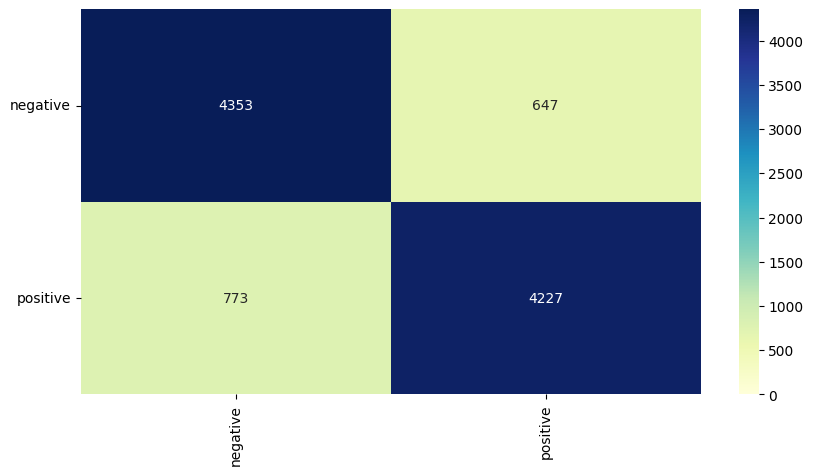

In [100]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(sentiment_test, mnb_test_predictions_tfid)
conf_matrix_df = pd.DataFrame(conf_matrix,index =['negative','positive'],columns = ['negative','positive'])

plt.figure(figsize=(10, 5))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Añadimos la matriz de confusión del Naive Bayes que mejor funciona, que es aque con el tfidfTransformer(). En ello podemos ver que tenemos 735 falsos negativos y 601 falsos positivos.

(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

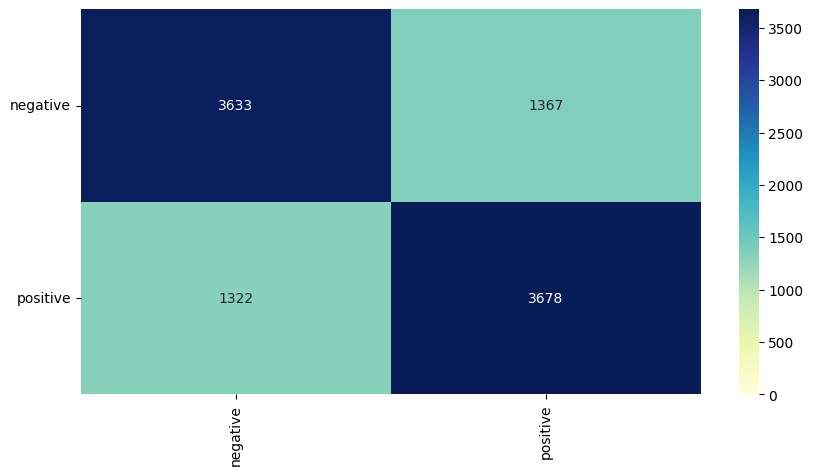

In [67]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(sentiment_test, tree_test_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,index = ['negative','positive'],columns = ['negative','positive'])

plt.figure(figsize=(10, 5))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Realizamos lo mismo con el mejor árbol de decision que es en este caso el que está sin transformar y vemos que hay muchos más falsos negativos y falsos positivos.

A continuación veremos las palabras más relevantes de cada uno de los clasificadores. Primero con Naive Bayes y posteriormente con los árboles de decisión, utilizando las funciones propuestas por el tutorial.

In [68]:
def print_top20_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    print("Top 20 features per class\n")
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.feature_log_prob_[i])[-20:]
        reversed_top = top20[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [69]:
print_top20_features_per_class_in_NB(vector,mnb_classifier,['negative','positive'])

Top 20 features per class

negative: movie / film / bad / like / really / movies / acting / plot / make / people / watch / worst / better / think / characters / way / thing / character / know / watching 

positive: movie / film / like / really / people / movies / watch / think / films / way / characters / character / years / know / make / funny / does / real / end / series 



Podemos ver las palabras más utilizadas por clase tanto en negativo como en positivo, como podemos ver la palabra good también aparece en negativo.

In [70]:
def print_top20_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names_out()
    
    top20 = np.argsort(clf.feature_importances_)[-20:]
    reversed_top = top20[::-1]
    print("Top 20 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))

In [71]:
print_top20_features_in_trees(vector,tree_classifier)

Top 20 features in the tree

bad / worst / waste / awful / excellent / wonderful / stupid / poor / terrible / minutes / supposed / poorly / movie / loved / plot / like / film / dull / amazing / ridiculous


Podemos ver cual son las palabras que mas se seleccionan para hacer la distinción entre nodos. Podemos ver que las palabras mas útlizadas son adjetivos calificativos que implican bueno o malo.

Como podemos ver, el árbol de decisión probablemente puede llegar a opinar que por usar adjetivos como poor la valoración sea negativa, pero puede ser que haya aspectos de la película que no te gusten y la valoración sea positiva.

In [97]:
x = 8 #condicion para salir del bucle
i = 0 #iterador
while i < len(sentiment_test) and x != 9:
  if sentiment_test.iloc[i] != mnb_test_predictions_tfid[i] and sentiment_test.iloc[i] == 'negative': # miramos que sea diferente y la valoracion real negativa
    x = 9
  else:
    i = i +1 
print(i)
print("Resultado que debería dar: ",sentiment_test.iloc[i]) #imprimimos la valoracion real
print("Resultado que da nuestro clasificador: ",mnb_test_predictions_tfid[i]) #imprimimos el 
print("Imprimimos el mensaje:\n",review_test.iloc[i])

5
Resultado que debería dar:  negative
Resultado que da nuestro clasificador:  positive
Imprimimos el mensaje:
 ...but I would be lying. A relative was a crew member, and we got to go watch the production of this movie for a couple of days (and I was an extra). I get to die and have a second of screen time, not that I plan on moving to Hollywood anytime soon. I just thought it was awesome to see how movies are made and be a part of it. Plus, I got a copy of the movie once it was finally released. They didn't have a studio backing when making this film so it truly was independent. Why the writing and acting is so awful is beyond me, but the main character "Cherry" is the director's sister so that could be part of it. But the cinematography was good. :)


Aquí el resultado debería ser negativo, sin embargo, nuestro clasificador es positivo debido a frases "go to watch this movie for days" o palabras como awesome que lo confunden

In [96]:
x = 8
i = 0
while i < len(sentiment_test) and x != 9:
  if sentiment_test.iloc[i] != mnb_test_predictions_tfid[i] and sentiment_test.iloc[i] == 'positive':
    x = 9
  else:
    i = i +1 
print(i)
print("Resultado que debería dar: ",sentiment_test.iloc[i])
print("Resultado que da nuestro clasificador: ",mnb_test_predictions_tfid[i])
print("Imprimimos el mensaje:\n",review_test.iloc[i])

38
Resultado que debería dar:  positive
Resultado que da nuestro clasificador:  negative
Imprimimos el mensaje:
 After seeing Big Fat Liar, I think Jason learned a lot more. When he told the truth about Marty stealing his story, it was like the boy who cried wolf. People heard him, but they didn't believe him. Nobody did anything to help him. Besides, not only Marty's movies stink, so does his advice. The truth is not overrated. I am so glad he got exposed for what he really is. Everyone found out that he stole from that boy, including his parents. Not only he stole from that boy and lied about it, he gave them someone else's work and tried to call it his own, which is plagiarism. Doesn't he know that it is illegal to plagiarize someone's idea? Another reason why he got fired. He is not trustworthy. He's a liar, a cheat, a thief, a crook, and a plagiarist. You got that Marty? You're a plagiarist. Plus, you got everything that you deserved.


En este caso debería ser una valoración positiva sin embargo es una valoración negativa de nuestro clasificador.
Eso se debe a frases como plagariaze, o "He is not trust worth it"


In [98]:
x = 8
i = 0
while i < len(sentiment_test) and x != 9:
  if sentiment_test.iloc[i] != tree_test_predictions[i] and sentiment_test.iloc[i] == 'positive':
    x = 9
  else:
    i = i +1 
print(i)
print("Resultado que debería dar: ",sentiment_test.iloc[i])
print("Resultado que da nuestro clasificador: ",tree_test_predictions[i])
print("Imprimimos el mensaje:\n",review_test.iloc[i])

20
Resultado que debería dar:  positive
Resultado que da nuestro clasificador:  negative
Imprimimos el mensaje:
 I remember Casper comic books, but don't remember any cartoons. Maybe they weren't memorable; I don't know but at my advanced age, here I am watching this very early Casper animated short yesterday. Afterward, I was shocked to read the user-comments here. Did people miss the ending?<br /><br />I have to learn all over again that Casper isn't like the other ghosts, who like to go out each night and scare the c--p out of everyone. "He sees no future in that," according to the narrator here. Instead, one night he goes out to the rural section of town, inadvertently scares some animals and can't find any friends. It brings him to tears, until a little fox hears him bawling and befriends him. The two become buddies but soon, the fox is running for his life with a fox hunt in progress.<br /><br />Other reviews have all mentioned what happens, so I'll touch on that, too. The fox is

Aquí debería dar positivo y da negativo debido a palabras como "werent memorable","shocked","scare".

In [99]:
x = 8
i = 0
while i < len(sentiment_test) and x != 9:
  if sentiment_test.iloc[i] != tree_test_predictions[i] and sentiment_test.iloc[i] == 'negative':
    x = 9
  else:
    i = i +1 
print(i)
print("Resultado que debería dar: ",sentiment_test.iloc[i])
print("Resultado que da nuestro clasificador: ",tree_test_predictions[i])
print("Imprimimos el mensaje:\n",review_test.iloc[i])

8
Resultado que debería dar:  negative
Resultado que da nuestro clasificador:  positive
Imprimimos el mensaje:
 As you can guess by my rating and my title of this review that I don't like Johnny Test. Now I think I know what people are going to say, " How do you know how bad it is? Have you ever watched it?", I did watch this show a couple times because I am studying film and animation and this just doesn't hold a candle to my standards.<br /><br />I want to first talk about the animation because it is one of the most confusing things I have ever seen. Like the first two seasons or only first season had hand drawn animation. I thought it was a nice show to look at when it was hand drawn but then it switched to flash animation and the quality went down by a huge amount.<br /><br />So that is one strike in my eyes but lets look at the story of the show. It tries way too hard to be like Dexter's lab but there are differences because instead of one red headed scientist there is two and the

El resultado debería ser negativo y da ser positivo. Debido a palabras como: "nice" or "huge amount"